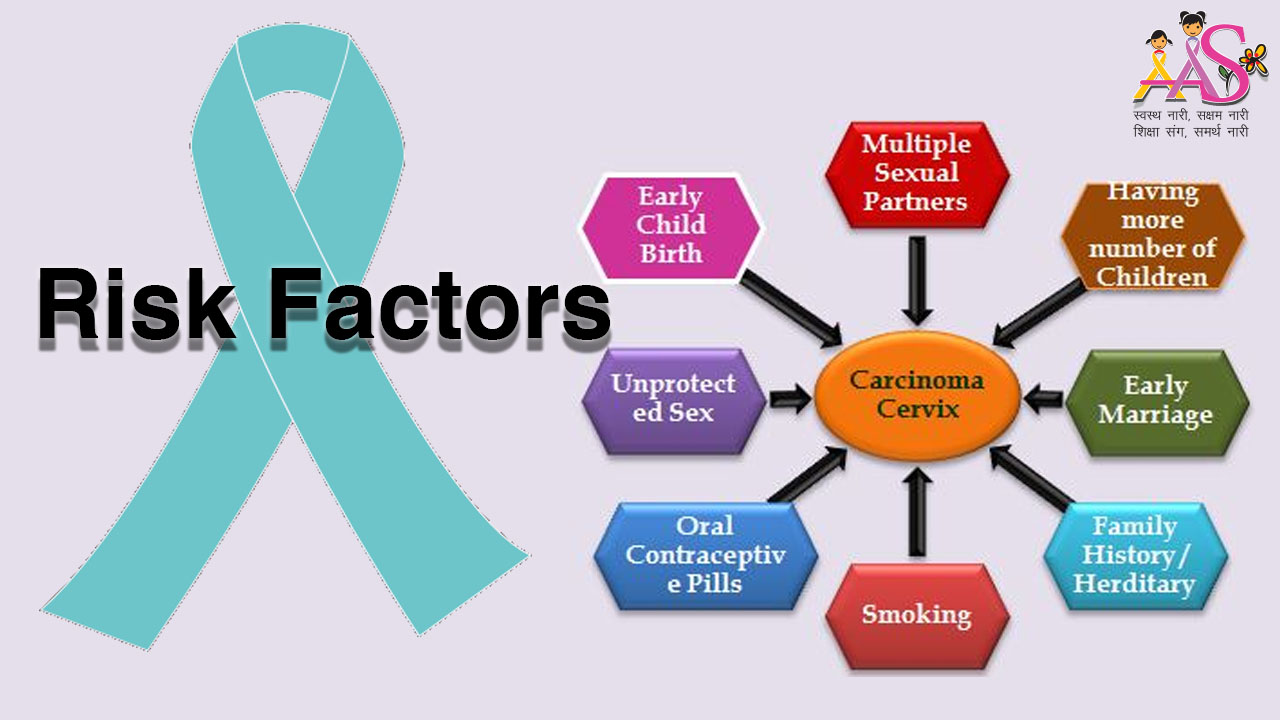

**Table Of Content**

* Importing Essential Libraries 
* Loading CSV file
* Univariate analysis
    * Categorising Dat
    * Dropping Unnecessary columns
* Outlier Treatment
* Exploratory Data Analysis
* Statistica Approach
      *Check for Normality
      *Test of Variance
* Model Building
      * Decision Tree
      * Random Forest
      * Bagged model
* Model evaluation
             
   

**OBJECTIVE:**

A risk factor is anything that increases a person's chance of developing cancer.
Although risk factors often influence the development of cancer, most do not directly cause cancer. 
Some people with several risk factors never develop cancer, while others with no known risk factors do. 
Knowing your risk factors and talking about them with your doctor may help you make more informed lifestyle 
and health care choices.

> **Importing essential Libraries**

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

> **Load and describe Data**

In [2]:
df=pd.read_csv('/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv')

In [3]:
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

**![](http://)> Categorising data **

In [5]:
num_cols=numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']


cat_cols=['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

**Dropping unneccessary columns**[](http://)

In [6]:
#we are dropping the STDs: column because these are of not of much use for our analysis bcz of having a lot of missing values

df.drop(['STDs: Time since last diagnosis','STDs: Time since first diagnosis'],inplace=True,axis=1)

In [7]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


**Missing value treatment**[](http://)

In [8]:
df=df.replace('?',np.NaN)

In [9]:
# now we  fill missing values in numerical columns with mean of numerical data 
for feature in num_cols:
    print(feature,'',df[feature].astype(float).mean())
    feature_mean = round(df[feature].astype(float).mean(),1)
    df[feature] = df[feature].fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395064923096
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648


In [10]:
for features in cat_cols:
    df[features]=df[features].astype(float).fillna(1.0)

**Exploaratry Data analysis**[](http://)

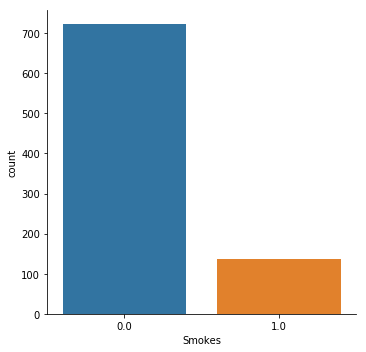

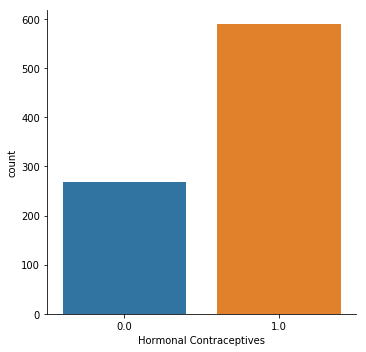

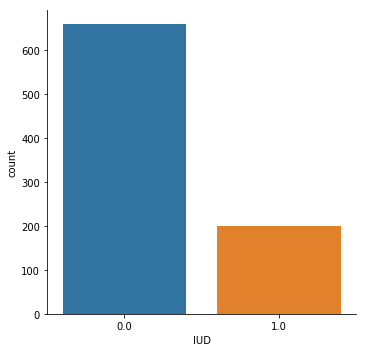

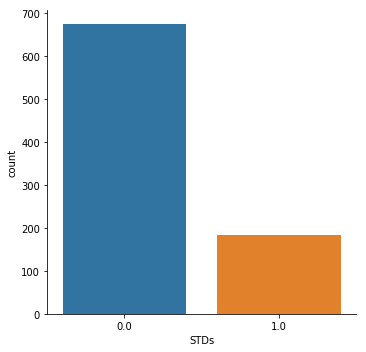

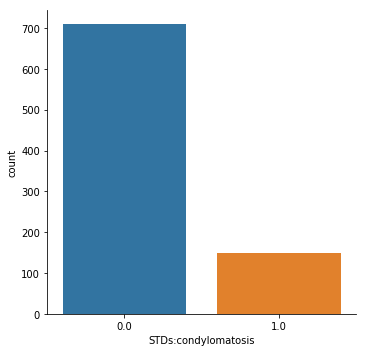

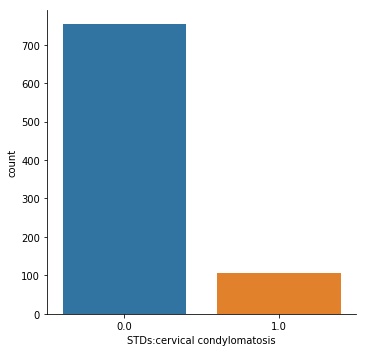

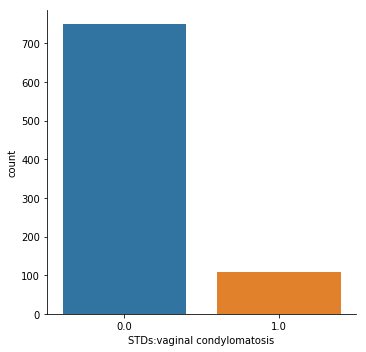

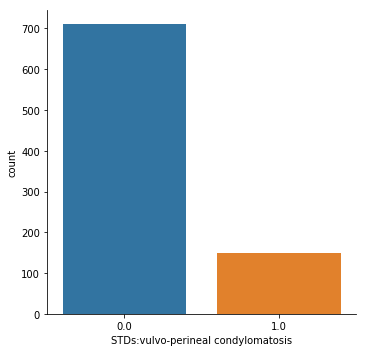

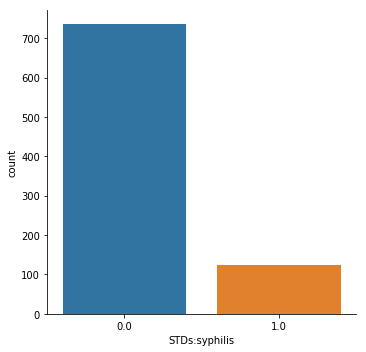

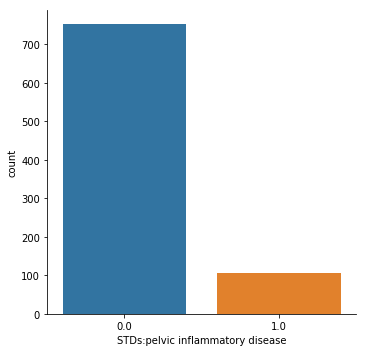

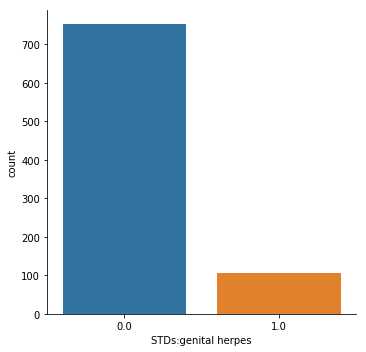

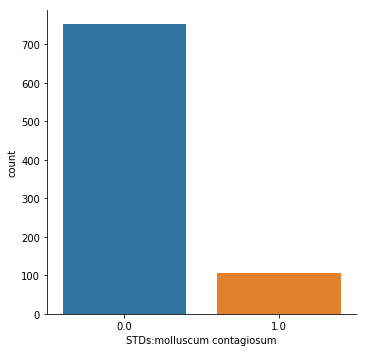

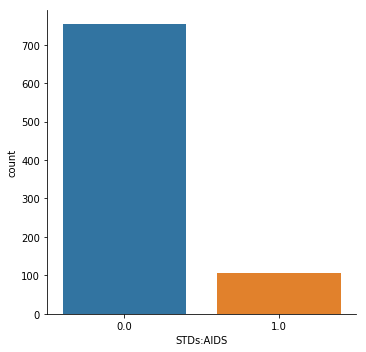

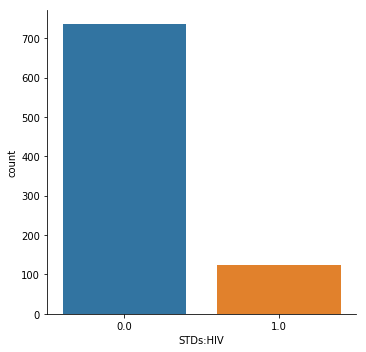

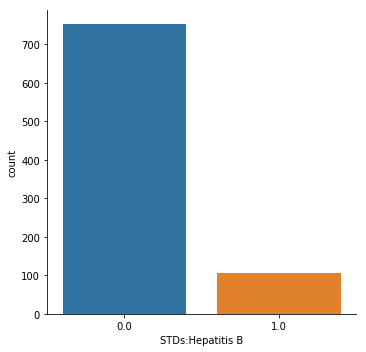

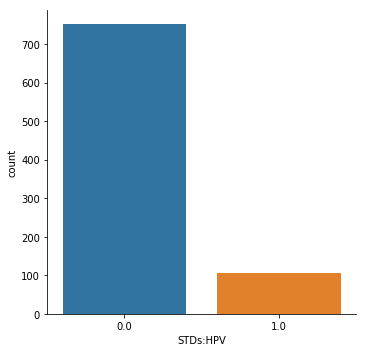

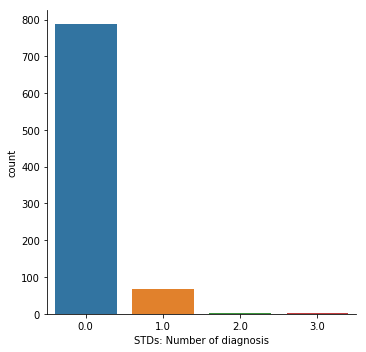

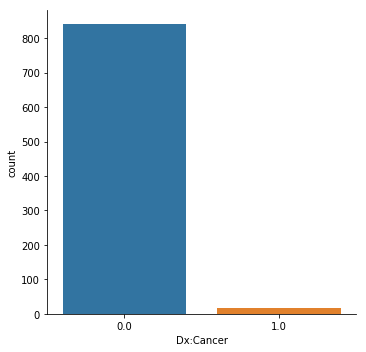

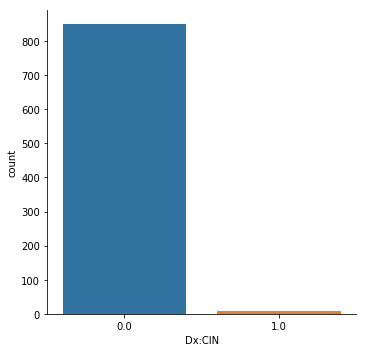

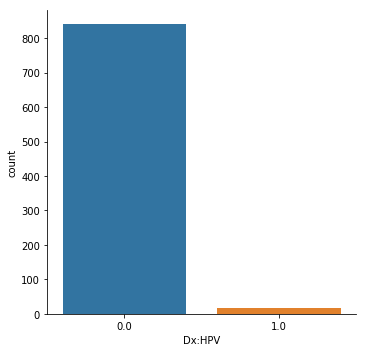

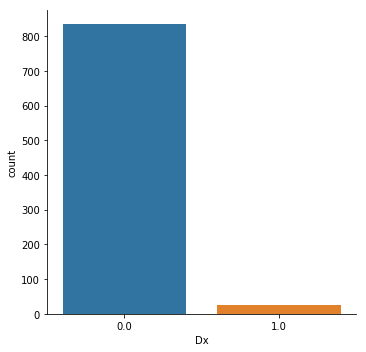

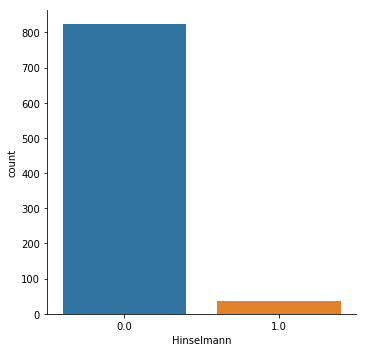

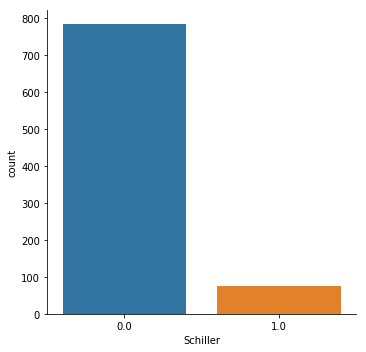

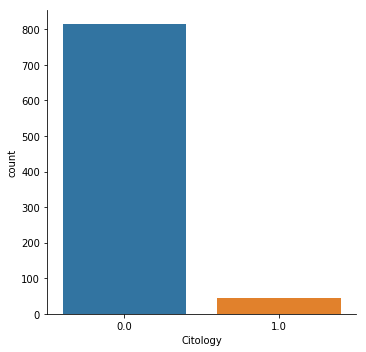

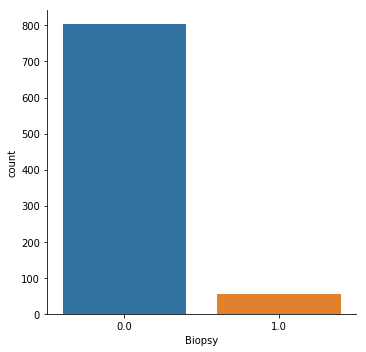

In [11]:
for feature in cat_cols:
    sns.factorplot(feature,data=df,kind='count')

from the above graph it is clear that the harmonal contraceptive have the highest key feature that affect
the cervical cancer .so lets concentrate more on this for our furthur analysis

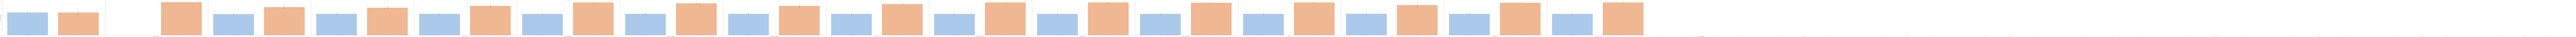

In [12]:
g = sns.PairGrid(df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= cat_cols,
                 aspect=2.75, size=10.5)
g.map(sns.barplot, palette="pastel");

In [13]:
df['Number of sexual partners'] = round(df['Number of sexual partners'].astype(float))
df['First sexual intercourse'] = df['First sexual intercourse'].astype(float)
df['Num of pregnancies']=round(df['Num of pregnancies'].astype(float))
df['Smokes'] =df['Smokes'].astype(float)
df['Smokes (years)'] =df['Smokes (years)'].astype(float)
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].astype(float)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype(float)
df['IUD (years)'] = df['IUD (years)'].astype(float)

print('minimum:',min(df['Hormonal Contraceptives (years)']))
print('maximum:',max(df['Hormonal Contraceptives (years)']))

minimum: 0.0
maximum: 30.0


mean age of woman facing the cervical cancer  26.82051282051282


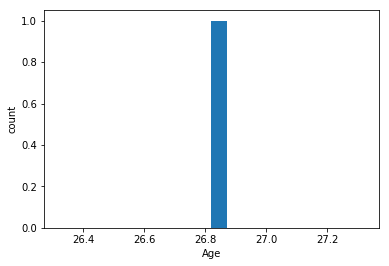

In [14]:
plt.hist(df['Age'].mean(),bins=20)
plt.xlabel('Age')                                 # age estimation for the risk of cervical cancer 
plt.ylabel('count')
print('mean age of woman facing the cervical cancer ',df['Age'].mean())


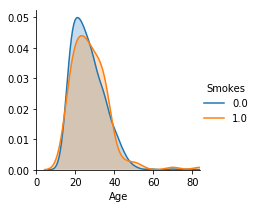

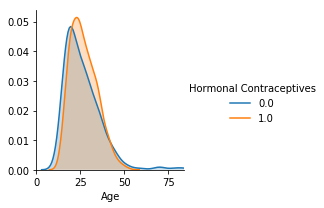

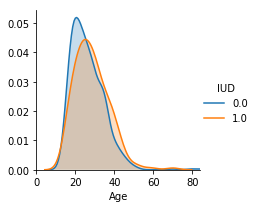

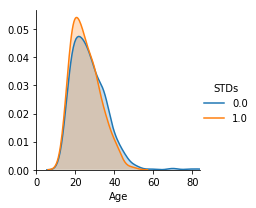

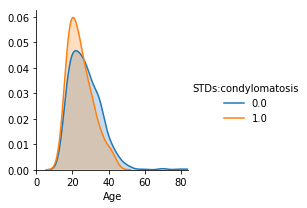

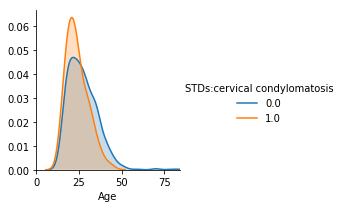

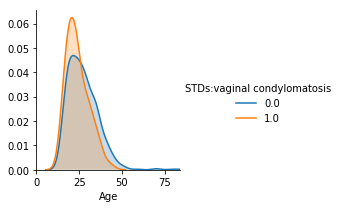

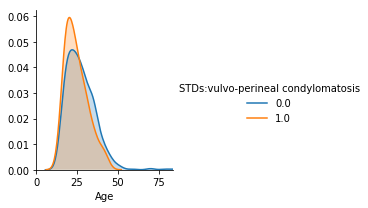

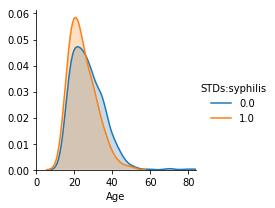

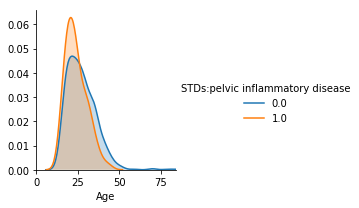

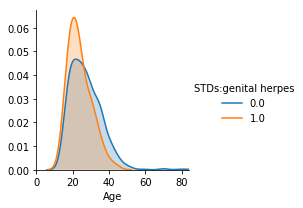

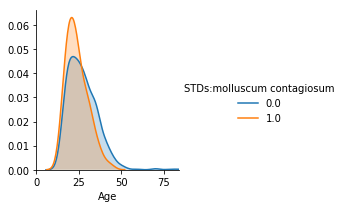

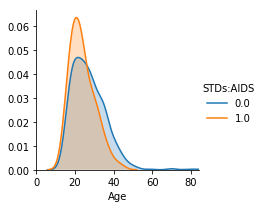

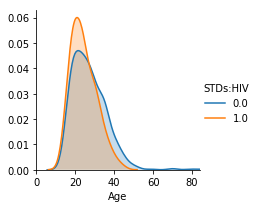

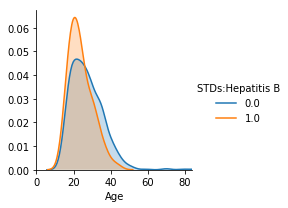

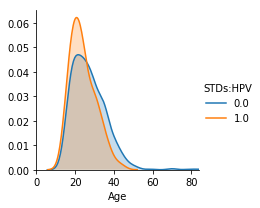

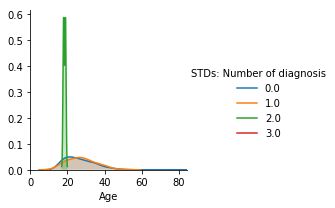

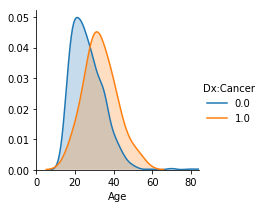

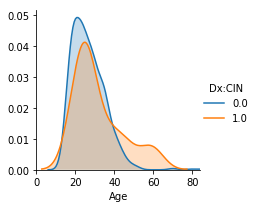

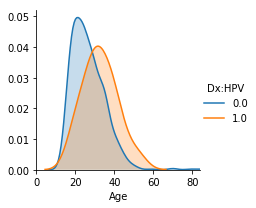

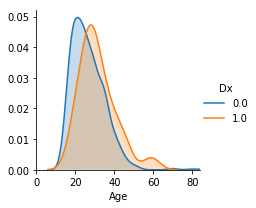

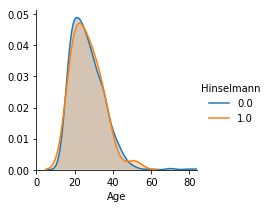

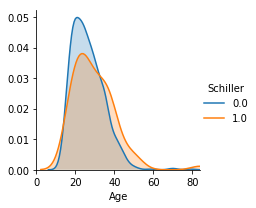

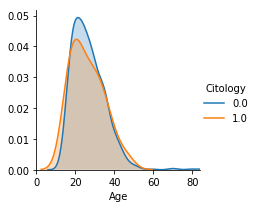

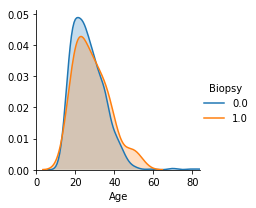

In [15]:
for feature in cat_cols:
    fig=sns.FacetGrid(df,hue=feature)
    fig.map(sns.kdeplot,'Age',shade=True)
    max_age=df['Age'].max()
    fig.set(xlim=(0,max_age))
    fig.add_legend()

the density plot shows that the woman who are having age of 26 are having a more chance of getting affected.
and also the woman age group of age between 20 to 35 are having a more chance of having cancer.The peak of age is at 50 and the extension shows the furthur too.

<Figure size 720x576 with 0 Axes>

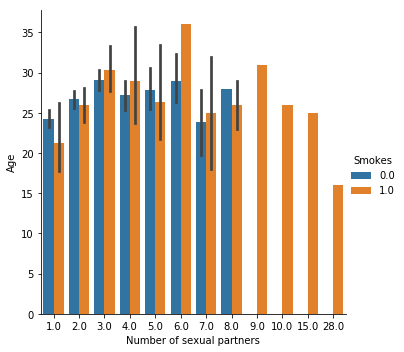

<Figure size 720x576 with 0 Axes>

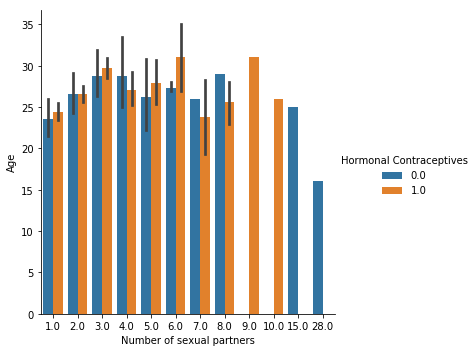

<Figure size 720x576 with 0 Axes>

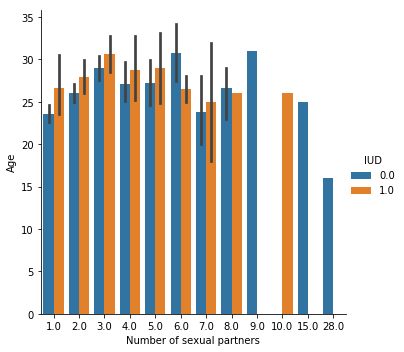

<Figure size 720x576 with 0 Axes>

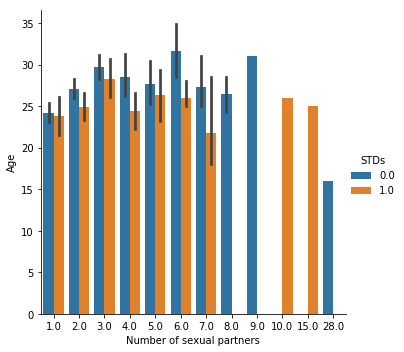

<Figure size 720x576 with 0 Axes>

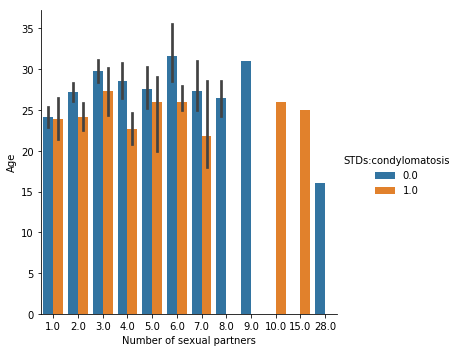

<Figure size 720x576 with 0 Axes>

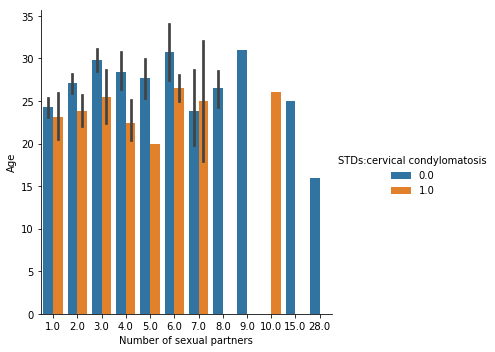

<Figure size 720x576 with 0 Axes>

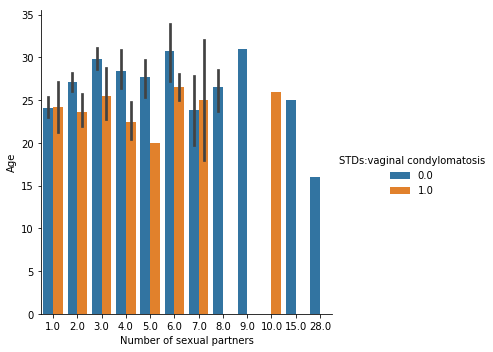

<Figure size 720x576 with 0 Axes>

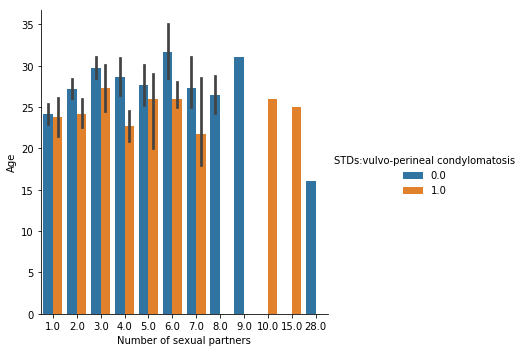

<Figure size 720x576 with 0 Axes>

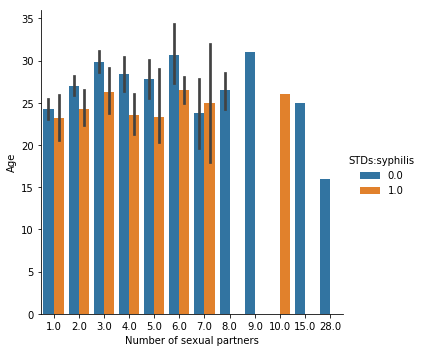

<Figure size 720x576 with 0 Axes>

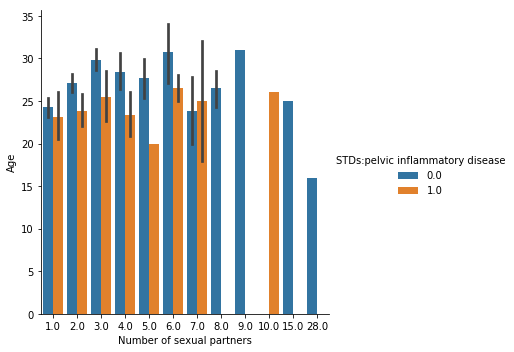

<Figure size 720x576 with 0 Axes>

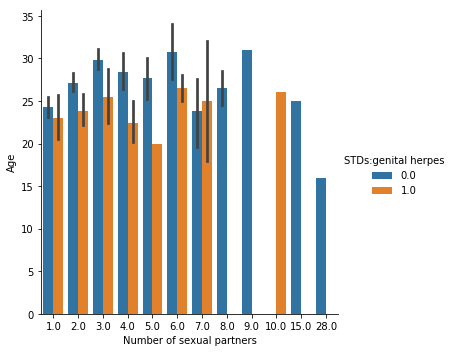

<Figure size 720x576 with 0 Axes>

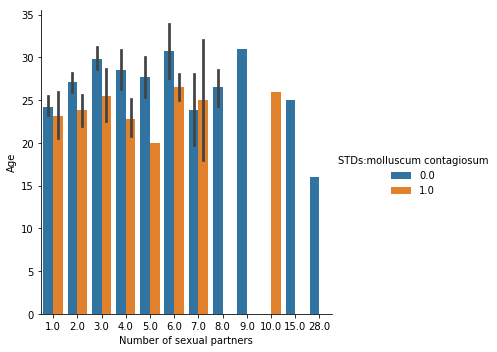

<Figure size 720x576 with 0 Axes>

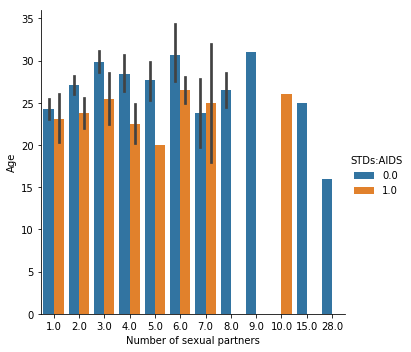

<Figure size 720x576 with 0 Axes>

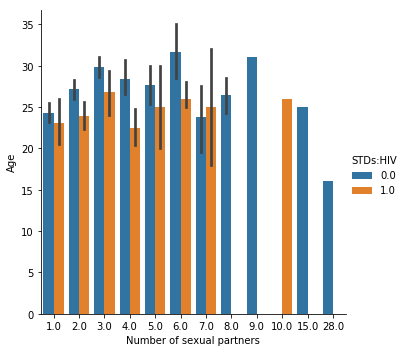

<Figure size 720x576 with 0 Axes>

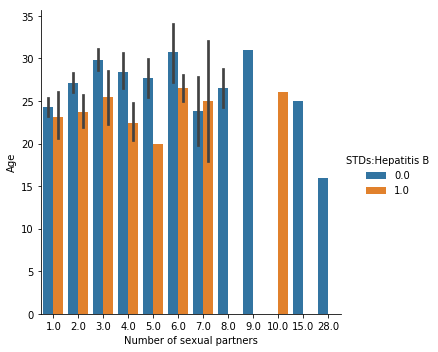

<Figure size 720x576 with 0 Axes>

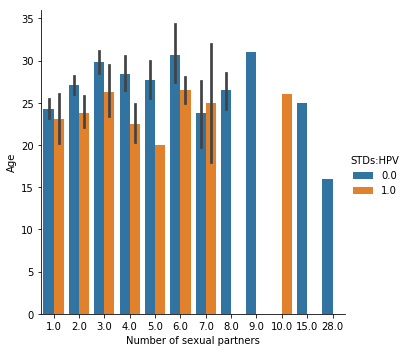

<Figure size 720x576 with 0 Axes>

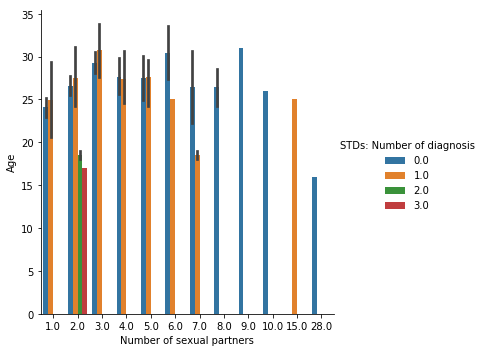

<Figure size 720x576 with 0 Axes>

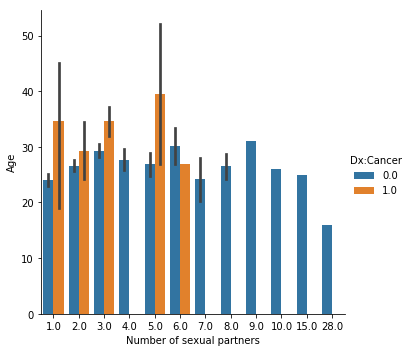

<Figure size 720x576 with 0 Axes>

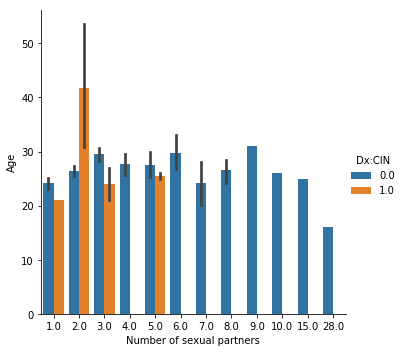

<Figure size 720x576 with 0 Axes>

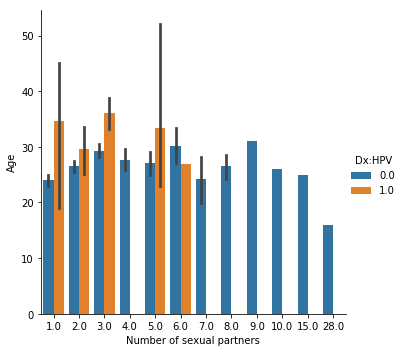

<Figure size 720x576 with 0 Axes>

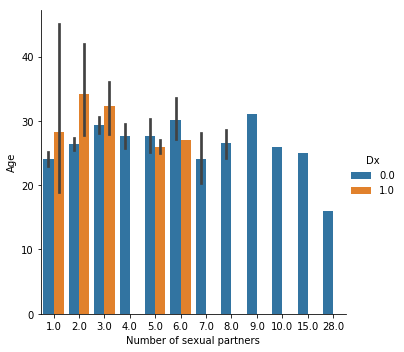

<Figure size 720x576 with 0 Axes>

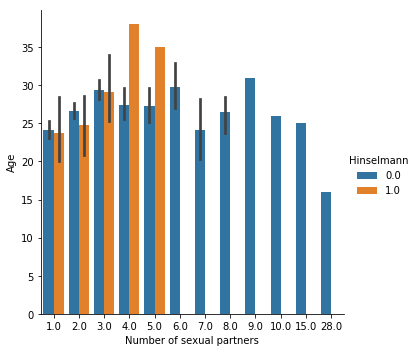

<Figure size 720x576 with 0 Axes>

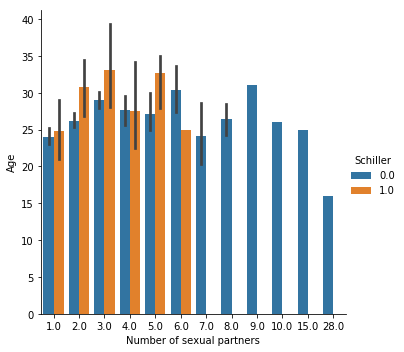

<Figure size 720x576 with 0 Axes>

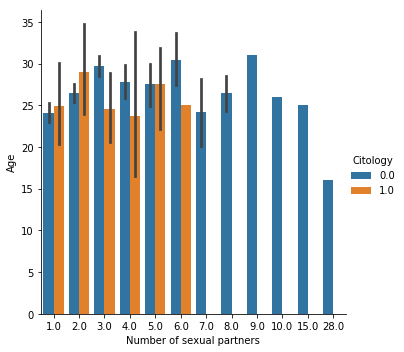

<Figure size 720x576 with 0 Axes>

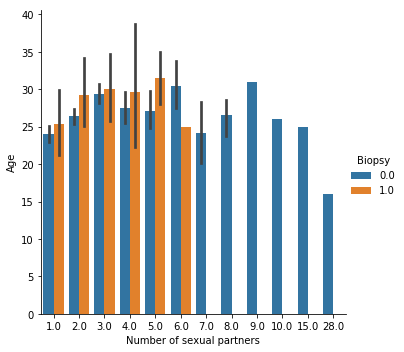

In [16]:
for feature in cat_cols:
    plt.figure(figsize=(10,8))
    sns.factorplot(x='Number of sexual partners',y='Age',hue=feature,data=df,kind='bar')

as the age increases the number of sexual partners increases too ,

causing to be one of the factor with getting a cancerous tumour

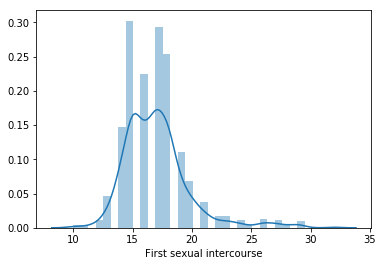

In [17]:
sns.distplot(df['First sexual intercourse'].astype(float))

plot depicts the woman started their first sexual intercourse at the age ranging 15-20 

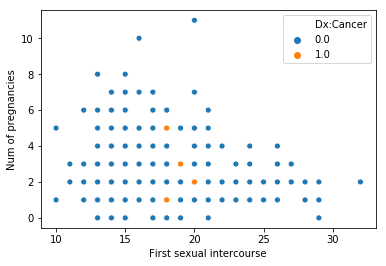

In [18]:
sns.scatterplot(x='First sexual intercourse',hue='Dx:Cancer',y='Num of pregnancies',data=df)

the relatioal plot depicts that the women who did their first  sexual itercourse at age of 18-20 and their number of pregnancies ranging (1-3)are more prone to cancer tumour

### statistical approach

#### To check  if there age is  impacting the cancer ?

In [19]:
df['Dx:Cancer'].value_counts()

0.0    840
1.0     18
Name: Dx:Cancer, dtype: int64

In [20]:
A1=df.groupby(['Dx:Cancer'])

In [21]:
cancer_patients=A1.get_group(1)
cancer_free_patients=A1.get_group(0)

###### unpaired t test

In [22]:
age_affected_cancer=cancer_patients['Age']
age_notaffected=cancer_free_patients['Age']

In [23]:
age_affected_cancer.describe()

count    18.000000
mean     33.222222
std       8.235901
min      19.000000
25%      27.500000
50%      31.500000
75%      38.000000
max      52.000000
Name: Age, dtype: float64

In [24]:
age_notaffected.describe()

count    840.000000
mean      26.683333
std        8.455293
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64

(array([2., 0., 3., 5., 1., 3., 2., 1., 0., 1.]),
 array([19. , 22.3, 25.6, 28.9, 32.2, 35.5, 38.8, 42.1, 45.4, 48.7, 52. ]),
 <a list of 10 Patch objects>)

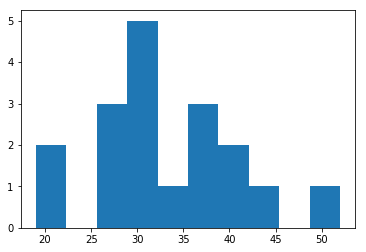

In [25]:
plt.hist(age_affected_cancer)

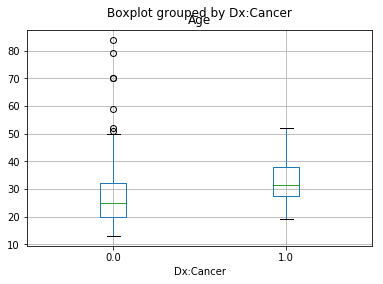

In [26]:
df.boxplot(column='Age',by='Dx:Cancer')

Hypothesis 

H0:mu(age)cancer=mu(age)not_affected

H1:mu(age)cancer!=mu(age)not_affected

##### check for normality

In [27]:
from scipy.stats import shapiro
print(shapiro(age_affected_cancer))
print(shapiro(age_notaffected))

(0.9731863737106323, 0.8550063967704773)
(0.9114524126052856, 1.050076404145071e-21)


hence the pvalue is greater than alpha so we will accept the null hypothesis this interprets that the data is normal

##### check for variance

In [28]:
from scipy.stats import levene

In [29]:
levene(age_affected_cancer,age_notaffected)

LeveneResult(statistic=0.0358966259897837, pvalue=0.8497740440428332)

In [30]:
from scipy.stats import ttest_ind

In [31]:
ttest_ind(age_affected_cancer,age_notaffected)

Ttest_indResult(statistic=3.248093837976839, pvalue=0.0012070566103731261)

###### so this interprets that the pvalue is less than alpha(0.05) hence from 95% cnfidence we can conclude our judgment that the mean age of poulation is not affecting the cancer occurnce

### check whether the fist sexual intercourse is impacting the cancerous tumour ?

In [32]:
df['Dx:Cancer'].value_counts()

0.0    840
1.0     18
Name: Dx:Cancer, dtype: int64

In [33]:
s=df.groupby(['Dx:Cancer'])

In [34]:
s1=s.get_group(1)
s2=s.get_group(0)

In [35]:
sexual_intercourse=s1['First sexual intercourse']
no_sexual_intercourse=s2['First sexual intercourse']

In [36]:
sexual_intercourse.describe()

count    18.000000
mean     18.277778
std       1.903729
min      14.000000
25%      18.000000
50%      18.500000
75%      19.000000
max      22.000000
Name: First sexual intercourse, dtype: float64

In [37]:
no_sexual_intercourse.describe()

count    840.000000
mean      16.967857
std        2.802207
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64

Hypothesis

H0:mean(first_sexual_intercourse)=mean(no_sexual_intercourse)
    
H1:mean(first_sexual_intercourse)!=mean(no_sexual_intercourse)

###### check for normality

In [38]:
print(shapiro(sexual_intercourse))   #H0:data follows normality   H1:data not following normality
shapiro(no_sexual_intercourse)

(0.9354585409164429, 0.2419462502002716)


(0.8748811483383179, 2.0936089858058497e-25)

###### the normality test interprets that the p value is geater than alpha(0.05) hence we will accept the null hypothesis andcan conclude that the data is following normal and is parametric ,hence next we will check for the variance between the data so to satisfy the assumptions

#### variance test

In [39]:
levene (sexual_intercourse,no_sexual_intercourse)  #H0:variance of (sexual_intercourse)having cancer=var(no_sexual_intercourse)having cancer
                                                    #H1:variance of (sexual_intercourse)having cancer!=var(no_sexual_intercourse)having cancer

LeveneResult(statistic=1.4101634718503486, pvalue=0.23535866875534392)

the variance test interprets that the pvalue is greater than alpha hence we will accept the null hypothesis and can conclude
that the variance of (sexual_intercourse)having cancer==variance (no_sexual_intercouse)having cancer

###### though our both variables passed the test of normality and test of variance hence the variables are parametric so we wil go through the unpaired ttest.

##### Test of independency

In [40]:
ttest_ind(sexual_intercourse,no_sexual_intercourse)

Ttest_indResult(statistic=1.9729300095824416, pvalue=0.04882491595482402)

#### though our pvalue is less than alpha hence we will reject the null-hypothesis and with 95% confidence we can judge that the mean of first_sexua_intercourse=mean of no_sexual_intercourse so there is a impact of first sexual intercourse over thecause of cancer tumour 

## Building the model

In [41]:
from sklearn.model_selection import cross_val_score # Cross Validation Score
from sklearn.model_selection import GridSearchCV # Parameters of the Model
from sklearn.model_selection import RandomizedSearchCV # Tuning the Parameters
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algo
from sklearn.ensemble import RandomForestClassifier # Random Forest Algo.
from sklearn.model_selection import train_test_split # helps in spliting the data in train and test set
from sklearn.metrics import accuracy_score # Calculating the Accuracy Score againts the Classes Predicted vs Actuals.
from sklearn.ensemble import BaggingClassifier

### Decision tree model

In [42]:
#defining my Xs and Ys
x=df.drop('Dx:Cancer',axis=1) #dropping the target
y=df['Dx:Cancer']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [43]:
#creatig our first model called Decisiontree
tree=DecisionTreeClassifier()

#defining tree params for grid based search
tree_params={
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":[3,4,5,6],
    "max_features":["auto","sqrt","log2"],
    "random_state": [123]
}

In [44]:
# apply grid search algorithm

grid=GridSearchCV(tree,tree_params,cv=10)
grid


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                        

In [45]:
#lets fit into data so that it can giuve the best params

best_param_search=grid.fit(x_train,y_train)

best_param_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [46]:
#creating our first model called decision tree after hypertuning
 
tree2=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features= 'auto',random_state= 123,splitter='best')

#Developiug the model
model_tree=tree.fit(x_train,y_train)
pred_tree=tree.predict(x_test)
accuracy_score(y_test,pred_tree)

0.9844961240310077

### Random forest model

In [47]:
Rf_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0) 

### Bagged model

In [48]:
bag_model=BaggingClassifier(n_estimators=10,random_state=0)  #fully grown decision tree

In [49]:
bag_model2=BaggingClassifier(n_estimators=10,random_state=0,base_estimator=tree2)## Regularised decision tree

In [50]:
models=[]
models.append(('Decision tree',tree))
models.append(('Random Forest',Rf_model))
models.append(('Bagged_DT',bag_model))
models.append(('bagged_regularized',bag_model2))

In [51]:
models

[('Decision tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('Random Forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=0, verbose=0,
                         warm_start=False)),
 ('Bagged_DT',
  BaggingClassifier(ba

In [52]:
from sklearn import model_selection
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results,ddof=1))
    print(msg)

Decision tree: 0.883333 (0.026389)
Random Forest: 0.508333 (0.135764)
Bagged_DT: 0.975000 (0.003125)
bagged_regularized: 0.508333 (0.135764)


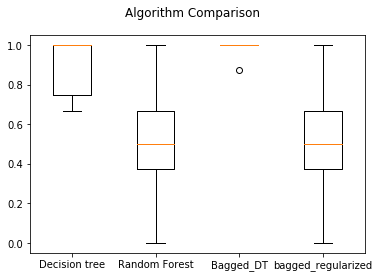

In [53]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#                        THE END

In [54]:
# #lets import adaboost and bagging classifier
# from sklearn.ensemble import BaggingClassifier
# bagg=BaggingClassifier()
# bagmodel=bagg.fit(x_train,y_train)
# #make prediction
# pred_bagged=bagg.predict(x_test)

In [55]:
# accuracy_score(y_test,pred_bagged)

In [56]:
# tree=DecisionTreeClassifier()
# cross_val_score(tree,x,y,cv=10).mean()